In [166]:
import numpy as np
import math
import sys
import time
import random
import matplotlib.pyplot as plt

class SAnnealing(object):

    def __init__(self, step = 1, final_temperature=0.1, temperature = 100, alpha=0.95, equilibrium=10, time = 0, data = []):
        self.step = step
        self.temperature = temperature
        self.final_temperature = final_temperature
        self.alpha = alpha
        self.equilibrium = equilibrium
        self.time = time
        self.data = data


    def cost_function(self, f, x):
        return f(self.data,x)


    def create_first_solution(self) -> list:
        first_solution = list(range(1, self.data.shape[0]+1))
        random.shuffle(first_solution)
        return first_solution


    def create_neighbor_solution(self, actual_solution: list) -> list:
        neighbor = actual_solution.copy()
        index1 = random.randint(0, len(neighbor)-1)
        number = neighbor[index1]

        while(1):
            index2 = random.randint(0, len(neighbor)-1)
            if index2 != index1:
                break
        neighbor[index1] = neighbor[index2]
        neighbor[index2] = number
        
        return neighbor


    def aceptance_probability(self, deltaE, temperature):
        try:
            r = math.exp(-deltaE/temperature)
        except OverflowError:
            r = float("inf") 
        return r


    def update_temperature(self, temperature):
        return self.alpha * temperature


    def fit(self, objetive):
        self.cost_ = []
        actual_solution = self.create_first_solution()
        best_solution = actual_solution.copy()
        epoch = 0
        number_tested_solution = 0
        aceptanced = 100
        while (self.temperature > self.final_temperature):
            
            number_worst_solution_acepted = 0
            i = 0
            while (i < self.equilibrium):
                random_solution = self.create_neighbor_solution(actual_solution)
                number_tested_solution += 1
                delta_E = self.cost_function(objetive, random_solution) - self.cost_function(objetive, actual_solution)
                if delta_E < 0:
                    actual_solution = random_solution.copy()
                else:
                    deg_deltaE = self.aceptance_probability(delta_E, self.temperature)
                    if(np.random.uniform(0, 1) < deg_deltaE):
                        actual_solution = random_solution.copy()
                        number_worst_solution_acepted += 1
                x= self.cost_function(objetive, actual_solution)
                self.cost_.append((x,1))
                epoch_strlen = len(str(epoch))
                sys.stderr.write('\r%0*d Epoch | Equilibrium %d | Temperature %.2f '
                                '| Cost function: %.2f | Aceptance : %.2f' 
                        %
                        (epoch_strlen, epoch+1, i+1, self.temperature, 
                        x, aceptanced ))
                time.sleep(self.time)
                sys.stderr.flush()
                i += 1
                epoch += 1
            aceptanced = number_worst_solution_acepted * 100 /number_tested_solution
            self.temperature = self.update_temperature(self.temperature)
            

In [167]:
def get_time_production(data: list, actual_solution: list) -> list:
  costMatrix = np.zeros((data.shape[0], data.shape[1]))
  matrixResult = []
  for value in actual_solution:
    matrixResult.append(data[(value-1),:].tolist())

  for i in np.arange(data.shape[0]):
    for j in np.arange(data.shape[1]):
      if(j == 0 ):
        cost = 0 if i == 0 else costMatrix[i-1][j]
      else:
        cost = max(costMatrix[i-1][j], costMatrix[i][j-1])
      res = cost + matrixResult[i][j]
      costMatrix[i][j] = res
  return costMatrix[i][j]

In [168]:
import csv
data = []
with open('./data/Instancia1.csv', 'r', newline='') as file:
  myreader = csv.reader(file, delimiter=',')
  for rows in myreader:
   data.append(rows)
data = np.array(data).astype("float")

In [169]:
sa = SAnnealing(step = 1, final_temperature=0.1, temperature = 500, alpha=0.95, equilibrium=10, time = 0, data = data)
sa.fit(get_time_production)

1670 Epoch | Equilibrium 10 | Temperature 0.10 | Cost function: 32.00 | Aceptance : 0.4260

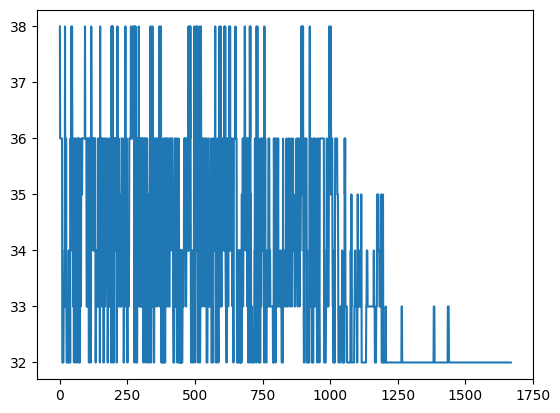

In [170]:
plt.plot(range(len(sa.cost_)), [x[0] for x in sa.cost_ ])
plt.show()